#**Actividad 8: Aprendizaje Supervisado (Regresión)**

###**Objetivo:** Predecir el costo del seguro médico (charges) a partir de variables como edad, IMC, ## de hijos, si fuma, región.
###**Variables Objeto:** Charges ya que representa el costo del seguro médico

In [ ]:
# 1. Importaciónde Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Including Dataset from Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/BIT/insurance.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Obtein basic information
display(df.columns)
display(df.describe())
display(df.info())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

###**Análisis exploratorio de datos**

In [ ]:
#Buscando datos nulos
df.isnull().sum()
if df.isnull().values.any():
  print("Hay datos nulos")
else:
  print("Se identifica que NO hay datos nulos en el DataSet")

Se identifica que NO hay datos nulos en el DataSet


In [ ]:
#Cantidad de valores en las columnas categoricas
for col in df.select_dtypes(include=['object']):
  print(f"{col}: {df[col].unique()}")

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


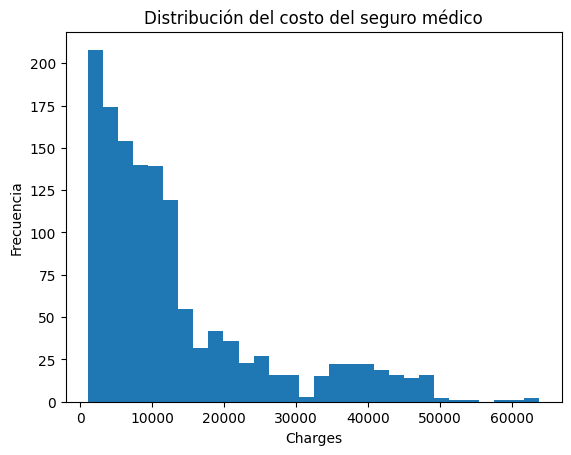

In [ ]:
#Revisando la categoria charges para visualizar valores extraños
plt.hist(df["charges"], bins=30)
plt.xlabel("Charges")
plt.ylabel("Frecuencia")
plt.title("Distribución del costo del seguro médico")
plt.show()

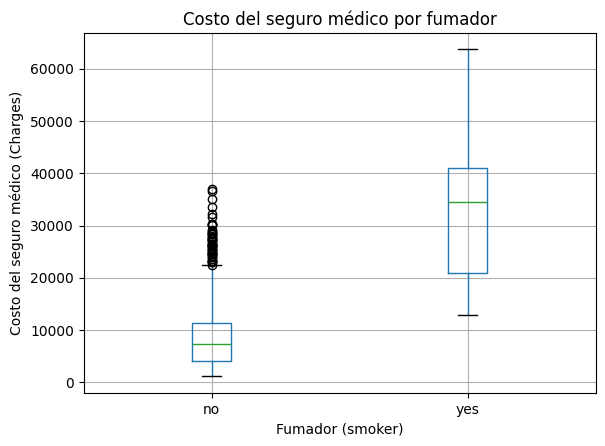

In [ ]:
#Revisando la categoria Smoker para visualizar el costos del seguro médico
df.boxplot(column="charges", by="smoker")

plt.title("Costo del seguro médico por fumador")
plt.suptitle("")
plt.xlabel("Fumador (smoker)")
plt.ylabel("Costo del seguro médico (Charges)")
plt.show()

In [ ]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


####**Interpretación:**
####-Las personas que fuman tienen costos médicos significativamente mayores a las pernasos que no fuman. Debido a que la mediana de los fumadores es considerablemente mayor. así como una mayor dispersión de datos.
####-Los costos de los fumadores son muy variables, mientras que los que no fuman son más estables.
####-En la gráfica de los no fumadores, se presentan algunos datos atipicos que posiblemente se asocian a otros casos característicos.


#**Preparación de datos**

In [ ]:
#Entrenando al modelo
X = df.drop('charges', axis=1)
Y = df['charges']
X = pd.get_dummies(X, drop_first=True) #Convertir palabras (categorías) en números para que el modelo pueda usarlas.
#Los modelos no entienden números
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Enseñar, evaluar, predecir
#El modelo aprende con X_train y y_train
#Se evalúa con X_test comparando con y_test
#Usa 20% de los datos para prueba
#Usa 80% para entrenamiento

#Escalando los datos para que los modelos funcionen
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


#**Modelo 1: Regresión Lineal**
#### La regresión lineal permite estimar una relación directa entre las variables predictoras y la variable objetivo, asumiendo un comportamiento lineal

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaler, Y_train)
Y_pred_lr = lr.predict(X_test_scaler)

#**Modelo 2: Ridge Regression**
#### Este modelo es una extensión de la regresión lineal que incorpora un término de regularización, el cual penaliza los coeficientes demasiado grandes y ayuda a reducir el sobreajuste.


In [ ]:
lr_ridge = Ridge(alpha=1.0)
lr_ridge.fit(X_train_scaler, Y_train)
Y_pred_ridge = lr_ridge.predict(X_test_scaler)

#**Modelo 3: Lasso Regression**
####Este modelo incorpora un término de regularización que permite reducir y eliminar coeficientes poco relevantes, facilitando la selección automática de variables y mejorando la interpretabilidad del modelo.

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaler, Y_train)
Y_pred_lasso = lasso.predict(X_test_scaler)

#**Modelo 4: Random Forest Regressor**
####Este modelo se basa en un conjunto de árboles de decisión que permiten capturar relaciones no lineales y manejar interacciones complejas entre las variables, sin requerir el escalado de los datos.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

#**Evaluación de modelos**
#### Determinar que modelo se ajusta más a los resultados esperados



In [ ]:
def evaluate_model(Y_test, Y_pred, model_name):
  mae = mean_absolute_error(Y_test, Y_pred)
  rmse =np.sqrt(mean_squared_error(Y_test, Y_pred))
  r2 = r2_score(Y_test, Y_pred)

  print(f"Modelo: {model_name}")
  print(f"MAE: {mae:.2f}")
  #En promedio, cuánto se equivoca el modelo, sin importar el signo.
  print(f"RMSE: {rmse:.2f}")
  #Penaliza más las malas predicciones.
  print(f"R2: {r2:.2f}")
  print("-" * 30)

evaluate_model(Y_test, Y_pred_lr, "Linear Regression")
evaluate_model(Y_test, Y_pred_ridge, "Ridge Regression")
evaluate_model(Y_test, Y_pred_lasso, "Lasso Regression")
evaluate_model(Y_test, Y_pred_rf, "Random Forest Regressor")


Modelo: Linear Regression
MAE: 4181.19
RMSE: 5796.28
R2: 0.78
------------------------------
Modelo: Ridge Regression
MAE: 4182.80
RMSE: 5796.98
R2: 0.78
------------------------------
Modelo: Lasso Regression
MAE: 4181.51
RMSE: 5796.65
R2: 0.78
------------------------------
Modelo: Random Forest Regressor
MAE: 2550.08
RMSE: 4576.30
R2: 0.87
------------------------------


####**Conclusión:** Los modelos de regresión lineal, ridge y lasso presentan valores similares en la variable R2 =0,78, lo que indica que explican el 78% de la variabilidad de los datos. Sin embargo, los tres modelos mencionados presentan un margen de error de MAE ≈ 4181, lo que limita sus precisión predictiva.
####Por otro lado el modelo Random Forest evidencia que el modelo puede explicar el 87% del comportamiento de los datos y su marge de erro es mucho menor MAE ≈ 2550, lo que determina al modelo Random Forest como el modelo más adecuado para la predicción de los resultados.


#**Gráfico de modelo Random Forest**

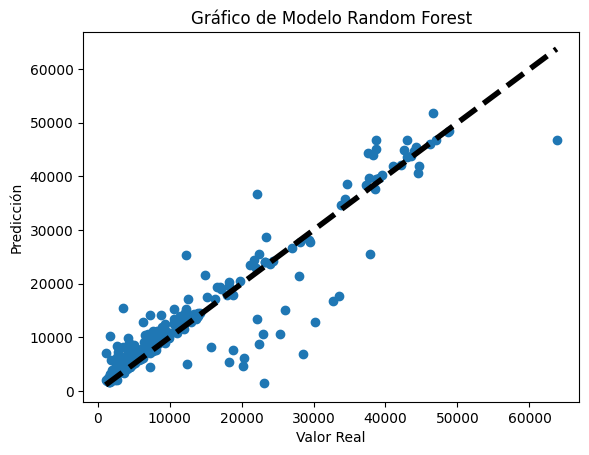

In [34]:
plt.scatter(Y_test, Y_pred_rf)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Gráfico de Modelo Random Forest")
plt.show()

####**Interpretación:** El modelo Random Forest muestra una buena correlación entre los valores reales y predichos, evidenciada por la cercanía de los puntos a la línea diagonal. El desempeño es especialmente sólido en costos bajos y medios, mientras que en valores altos se observa mayor dispersión. Esto sugiere que el modelo captura adecuadamente las relaciones no lineales del dataset, aunque presenta limitaciones al predecir casos extremos
